# Creating University Program Curriculumn based on Clustering of Skills in Job Postings


### Import Python libraries and priming ChatGPT API

In [ ]:
!pip install openai

In [ ]:
import openai
import os
from openai import OpenAI

In [ ]:
import numpy as np
import pandas as pd
import os
import requests
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk import ngrams
from collections import Counter
import re
from nltk.corpus import wordnet
nltk.download('wordnet')
from wordcloud import WordCloud

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
## Machine Learning libraries
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from scipy import zeros as sci_zeros
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
simplefilter("ignore", ClusterWarning)
import spacy
from sklearn.feature_extraction.text import CountVectorizer
import gensim.downloader as api
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
# Set your OpenAI API key
API_KEY = 'Add_your_API_Key'

os.environ['OPENAI_API_KEY'] = API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")

# OpenAI API parameters
model = "gpt-3.5-turbo-0125" # 16K tokens
#model = "gpt-4" # 8K tokens

#Load job postings web-scraped from Indeed.com

In [ ]:
results = pd.read_csv('/content/webscraping_results_assignmnet3.csv')
print("Size:", results.shape)
results.head()

Size: (3592, 8)


,Title,Company,Location,Rating,Date,Salary,Description,Links
0,Board Certified Behavior Analyst (BCBA),Haim ABA Services,"Hybrid remote in Cumming, GA 30040",NaN,2 days ago,"$75,000 - $110,000 a year",Responsibilities:\n- Conduct assessments and d...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
1,BCBA- Behavior Analyst,"Regional Behavioral Consultants, Inc","Meadville, PA 16335",NaN,2 days ago,From $40 an hour,BCBA!\n**Rate dependent on experience\nReady f...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
2,Sales Analyst,Spherion Staffing,"Baldwin, GA 30511",NaN,3 days ago,"$60,000 - $65,000 a year",Sales Analyst Job Description\nOur client is l...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
3,Data Analyst,Wallis Companies,"Hybrid remote in Cuba, MO 65453",NaN,4 days ago,NaN,"SUMMARY\nIn the position of Data Analyst, you'...",https://www.indeed.com/rc/clk?jk=057aef19aad5f...
4,Jr. Data Analyst,JHEx INC,"California, KY 41007",NaN,2 days ago,NaN,About the Role:\nWe are looking for a talented...,https://www.indeed.com/rc/clk?jk=57d12f6368e9d...


In [ ]:
results.drop_duplicates(subset=['Links'], keep='first', inplace=True) #making sure no duplicated results
results = results.dropna(subset=['Description'])
print("Size:", results.shape)
results.head()

Size: (3592, 8)


,Title,Company,Location,Rating,Date,Salary,Description,Links
0,Board Certified Behavior Analyst (BCBA),Haim ABA Services,"Hybrid remote in Cumming, GA 30040",NaN,2 days ago,"$75,000 - $110,000 a year",Responsibilities:\n- Conduct assessments and d...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
1,BCBA- Behavior Analyst,"Regional Behavioral Consultants, Inc","Meadville, PA 16335",NaN,2 days ago,From $40 an hour,BCBA!\n**Rate dependent on experience\nReady f...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
2,Sales Analyst,Spherion Staffing,"Baldwin, GA 30511",NaN,3 days ago,"$60,000 - $65,000 a year",Sales Analyst Job Description\nOur client is l...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
3,Data Analyst,Wallis Companies,"Hybrid remote in Cuba, MO 65453",NaN,4 days ago,NaN,"SUMMARY\nIn the position of Data Analyst, you'...",https://www.indeed.com/rc/clk?jk=057aef19aad5f...
4,Jr. Data Analyst,JHEx INC,"California, KY 41007",NaN,2 days ago,NaN,About the Role:\nWe are looking for a talented...,https://www.indeed.com/rc/clk?jk=57d12f6368e9d...


#Data processing, feature engineering, and visualization

In [ ]:
def extract_main_skills(text): #defining a function to get the main skills mentioned
    # Prompt for the model
    prompt = "extract the main data science technical and personal skills mentioned in the following briefly (2 words per skill): '{}'".format(text)

    # Send prompt to the API
    client = OpenAI()
    response = client.chat.completions.create(
      model = model,
      max_tokens=100,
      messages = [
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt}
      ]
    )

    return response.choices[0].message.content

Total_ChatGPT_skills = ""
for i in results['Description']:
  current_skills = extract_main_skills(i)
  print(current_skills)
  Total_ChatGPT_skills += current_skills

with open("ChatGPT_skills.txt", "w") as file:
  file.write(Total_ChatGPT_skills)

Technical Skills:
- Assessments, Treatment Plans
- ABA Interventions
- Data Collection, Analysis
- Collaboration, Coordination
- Training, Support
- Medical Records

Personal Skills:
- Strong Interpersonal
- Effective Communication
- Independent Work
- Problem-solving
- Decision-making
Technical Skills:
- Data Analysis
- Behavior Intervention
- Client Treatment
- Behavior Assessment
- Program Development

Personal Skills:
- Communication
- Adaptability
- Leadership
- Patience
- Emotional Intelligence
Technical Skills:
- Data analysis
- Forecasting
- Reporting
- Excel
- Problem-solving

Personal Skills:
- Communication
- Detail-oriented
- Work ethic
- Teamwork
- Initiative
Technical Skills:
1. SQL Proficiency
2. Data Modeling
3. Data Analysis
4. Reporting Tools (Tableau, Power BI)
5. Statistical Techniques
6. Machine Learning
7. Data Validation
8. Data Quality Assurance

Personal Skills:
1. Analytical Mindset
2. Communication Skills
3. Collaboration
4. Detail-Oriented
5. Customer Servic

In [ ]:
def extract_main_skills_2(text): #defining a function to get the main 30 skills
    # Prompt for the model
    prompt = "extract the main and most common unnique 30 skills in the following briefly (2 words per skill): '{}'".format(text)

    # Send prompt to the API
    client = OpenAI()
    response = client.chat.completions.create(
      model = model,
      max_tokens=200,
      messages = [
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt}
      ]
    )

    return response.choices[0].message.content

Best_30_skills = extract_main_skills_2(Total_ChatGPT_skills)
print(Best_30_skills)

Most Common Unique 30 Skills Extracted:

Technical Skills:
- Data Analysis
- SQL proficiency
- Data Modeling
- Data Visualization
- Programming skills
- Machine Learning
- Statistical Techniques
- ETL Processes
- Database Management
- Predictive Analytics
- Business Intelligence
- ERP Implementation
- Cloud Services
- AI Technologies
- Dashboard Development
- Statistical Reporting
- Project Monitoring
- Statistical Modeling
- Software Engineering
- DevOps
- Statistical Analysis
- Big Data
- Data Collection
- Bioinformatics
- Statistical Inference
- Genomic Analysis
- Data Preparation
- Exploratory Analysis
- Metrics Identification
- Trend Analysis

Personal Skills:
- Communication
- Problem-Solving
- Collaboration
- Analytical Thinking
- Teamwork
- Adaptability
- Detail-Oriented
- Leadership
- Critical Thinking
- Innovation
- Continuous Learning
- Self-Motivated
- Effective Communication
- Interpersonal Skills



In [ ]:
# List of skills to check for
skills_to_check = ['Python', 'Matlab', 'Excel', 'SQL', 'Matlab', 'Hadoop', 'R', 'SAS', 'Spark', 'Java', 'NLP', 'NoSQL',
                      'C++', 'C', 'Git', 'Tableau', 'TensorFlow', 'PyTorch', 'Modeling', 'Optimization', 'Consulting', 'Teamwork', 'Creativity', 'Communication',
                      'Adaptability', 'Jupyter Notebook', 'Data Management', 'Big Data', 'Machine Learning', 'Statistical Analysis', 'Deep Learning',
                      'Artificial Intelligence', 'Data Visualization', 'Data Cleaning', 'Reinforcement Learning', 'Anomaly Detection', 'Computer Vision', 'Time Series',
                      'Supervised Learning', 'Unsupervised Learning', 'Semi-Supervised Learning', 'Ensemble Learning', 'Neural Network', 'Data Mining', 'Feature Engineering',
                      'Project Management', 'Negotiation Skills', 'Ethical Awareness','ETL','Cloud Services','Leadership','Innovation']

def count_skill_occurrences(description, skills):
    if isinstance(description, str):  # Check if description is a string
        description_lower = description.lower()
    else:
        description_lower = ""  # Set an empty string if description is not a string (e.g., NaN)
    skill_occurrences = {skill: len(re.findall(r'\b{}\b'.format(re.escape(skill.lower())), description_lower)) for skill in skills}
    return skill_occurrences


# Count occurrences of skills in each description
skill_occurrences = results['Description'].apply(lambda x: count_skill_occurrences(x, skills_to_check))

# Summarize counts for each skill
skill_counts_df = pd.DataFrame(skill_occurrences.tolist(), index=results.index)
#skill_counts_df = pd.DataFrame(skill_occurrences.tolist(), index=results.index)
total_skill_counts = skill_counts_df.sum()

sorted_skill_counts = sorted(total_skill_counts.items(), key=lambda x: x[1], reverse=True)

# Print the top 40 skills
print("Top 40 skills:")
for skill, count in sorted_skill_counts[:40]:
    print(f"{skill}: {count}")

Top 40 skills:
Communication: 3048
Leadership: 2729
SQL: 2313
Machine Learning: 2184
Python: 1889
Modeling: 1522
Innovation: 1448
R: 992
Project Management: 838
Excel: 832
Tableau: 777
Optimization: 761
ETL: 757
Data Management: 731
Data Visualization: 620
C: 543
Spark: 529
Big Data: 516
Artificial Intelligence: 514
Consulting: 512
Creativity: 394
Deep Learning: 336
Statistical Analysis: 323
Java: 318
NLP: 293
Teamwork: 266
Data Mining: 245
SAS: 219
Hadoop: 202
PyTorch: 182
TensorFlow: 161
NoSQL: 150
Computer Vision: 142
Git: 134
Cloud Services: 105
Adaptability: 74
Matlab: 72
Time Series: 64
Data Cleaning: 62
Reinforcement Learning: 55


In [ ]:
# List of skills to expand
skills_to_check = ['Communication','Leadership','SQL','Machine Learning','Python','Modeling','Innovation','R','Project Management',
                   'Excel','Tableau','Optimization','ETL','Data Management','Data Visualization','C','Spark','Big Data','Artificial Intelligence',
                   'Consulting','Creativity','Deep Learning','Statistical Analysis','Java','NLP','Teamwork','Data Mining','SAS','Hadoop','PyTorch','TensorFlow','NoSQL',
                   'Computer Vision','Git','Cloud Services','Adaptability','Matlab','Time Series','Data Cleaning','Reinforcement Learning']

# Function to expand skills using WordNet
def expand_words(skill):
    # Initialize expanded_skills list with the original skill
    expanded_skills = [skill]
    # Get synonyms for the skill using WordNet
    synsets = wordnet.synsets(skill)
    for synset in synsets:
        for lemma in synset.lemmas():
            expanded_skills.append(lemma.name())
    # Remove duplicates and return the expanded skills
    return list(set(expanded_skills))

# Expand skills
expanded_skills = {}
for skill in skills_to_check:
    expanded_skills[skill] = expand_words(skill)

res = results[['Title', 'Company', 'Location', 'Description']].copy()

# Function to search for skills in the description column
def search_skills(description):
    skill_presence = []
    for skill, variations in expanded_skills.items():
        pattern = r'\b(?:' + '|'.join([re.escape(variation) for variation in variations]) + r')\b'
        if re.search(pattern, str(description), flags=re.IGNORECASE):
            skill_presence.append(1)
        else:
            skill_presence.append(0)
    return skill_presence

# Applying the function to the description column
res[list(expanded_skills.keys())] = res['Description'].apply(search_skills).apply(pd.Series)

res.head()


,Title,Company,Location,Description,Communication,Leadership,SQL,Machine Learning,Python,Modeling,...,TensorFlow,NoSQL,Computer Vision,Git,Cloud Services,Adaptability,Matlab,Time Series,Data Cleaning,Reinforcement Learning
0,Board Certified Behavior Analyst (BCBA),Haim ABA Services,"Hybrid remote in Cumming, GA 30040",Responsibilities:\n- Conduct assessments and d...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,BCBA- Behavior Analyst,"Regional Behavioral Consultants, Inc","Meadville, PA 16335",BCBA!\n**Rate dependent on experience\nReady f...,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Sales Analyst,Spherion Staffing,"Baldwin, GA 30511",Sales Analyst Job Description\nOur client is l...,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Data Analyst,Wallis Companies,"Hybrid remote in Cuba, MO 65453","SUMMARY\nIn the position of Data Analyst, you'...",1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Jr. Data Analyst,JHEx INC,"California, KY 41007",About the Role:\nWe are looking for a talented...,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


##Data Visualisation

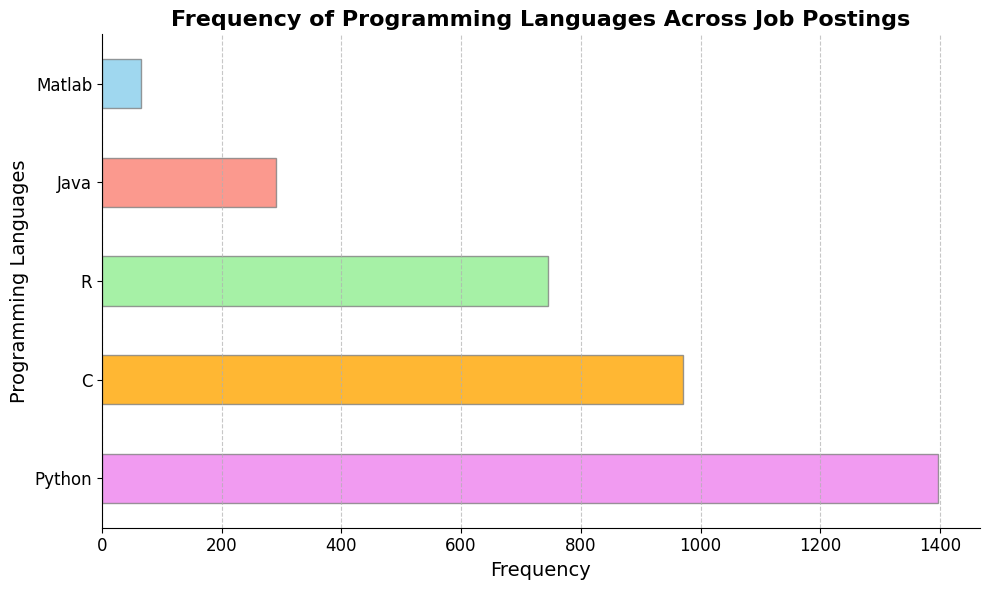

In [ ]:
Programming_languages = ['Python','R','C','Java','Matlab'] #number of listing

# Counting frequency of skills
skill_counts = res[Programming_languages].sum()

# Plotting the horizontal bar graph
plt.figure(figsize=(10, 6))
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'violet']  # Custom color palette
skill_counts.sort_values().plot(kind='barh', color=colors, edgecolor='grey', alpha=0.8)
plt.title('Frequency of Programming Languages Across Job Postings', fontsize=16, fontweight='bold')
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Programming Languages', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)  # Remove top border
plt.gca().spines['right'].set_visible(False)  # Remove right border
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.tight_layout()
plt.show()

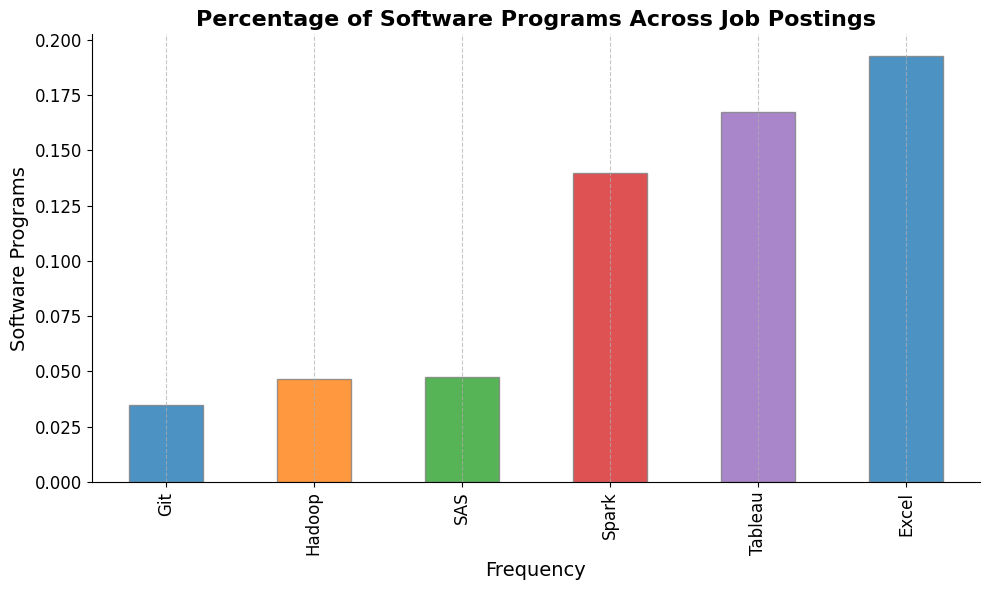

In [ ]:
Software_programs = ['Excel','Tableau','Spark','SAS','Hadoop','Git'] #percentage of job that requires it

# Counting frequency of skills
skill_counts = res[Software_programs].sum()/(res.shape[0])

# Plotting the bar graph
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Custom color palette
skill_counts.sort_values().plot(kind='bar', color=colors, edgecolor='grey', alpha=0.8)
plt.title('Percentage of Software Programs Across Job Postings', fontsize=16, fontweight='bold')
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Software Programs', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)  # Remove top border
plt.gca().spines['right'].set_visible(False)  # Remove right border
plt.tight_layout()
plt.show()

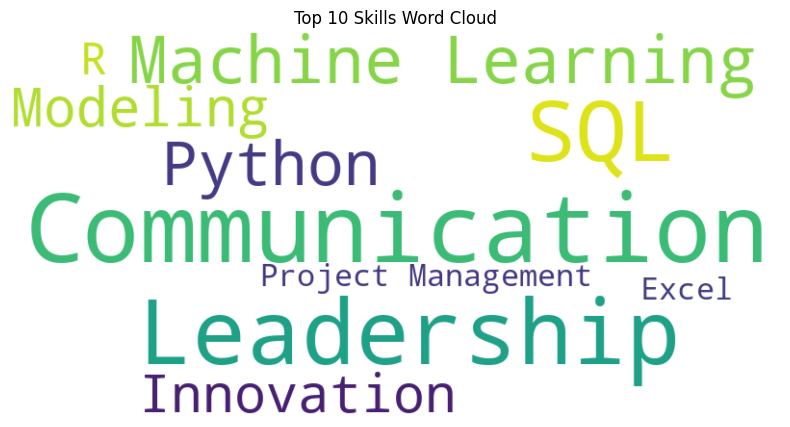

In [ ]:
top_10_skills = []
top_10_skills_freq = []
for skill, count in sorted_skill_counts[:10]:
    top_10_skills.append(skill)
    top_10_skills_freq.append(count)

skills_freq_dict = {skill: freq for skill, freq in zip(top_10_skills, top_10_skills_freq)}

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(skills_freq_dict)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 10 Skills Word Cloud')
plt.show()

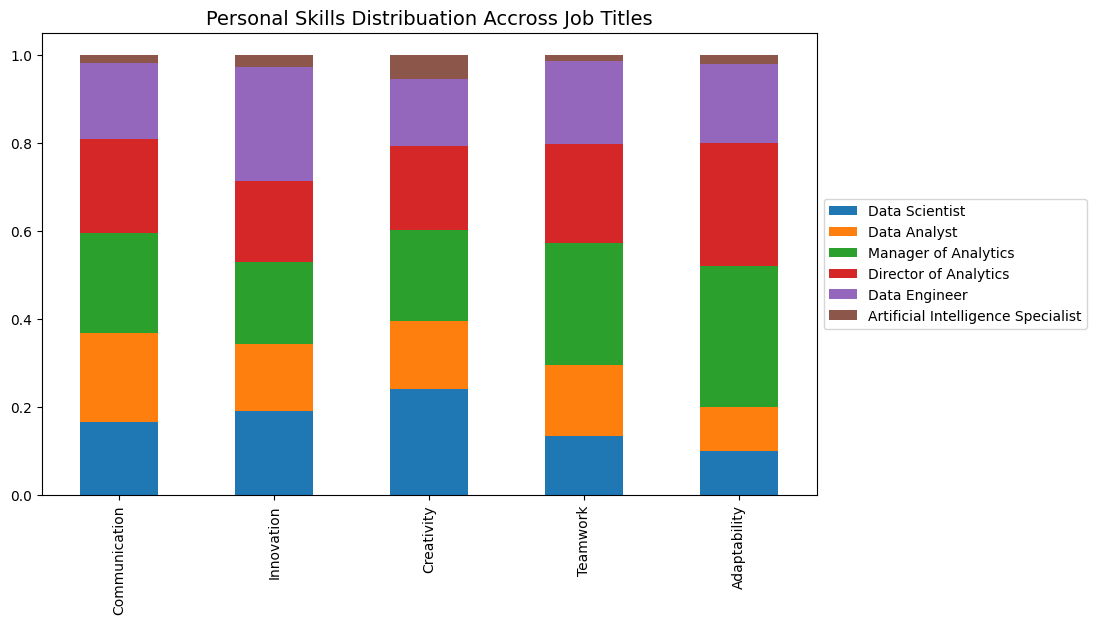

In [ ]:
pskills = ['Communication','Innovation','Creativity','Teamwork','Adaptability']

job_title = ['scientist', 'analyst', 'manager', 'director', 'engineer', ' AI ', 'Artificial Intelligence']

job_title_off = ['Data Scientist', 'Data Analyst', 'Manager of Analytics', 'Director of Analytics', 'Data Engineer', 'Artificial Intelligence Specialist']

pskills_vs_title = pd.DataFrame(0, index=pskills, columns=job_title_off)

expanded_pskills = {}
for psk in pskills:
    expanded_pskills[psk] = expand_words(psk) #expanding the pskills variations using the function defined before

job_title_list = []

for skill, variations in expanded_pskills.items():
  pattern1 = r'\b(?:' + '|'.join([re.escape(variation) for variation in variations]) + r')\b'
  for description,title in zip(res['Description'],res['Title']):
    if re.search(pattern1, str(description), flags=re.IGNORECASE):
      for level in job_title:
        pattern2 = r'\b(?:' + '|'.join([re.escape(level)]) + r')\b'
        if re.search(pattern2, str(title), flags=re.IGNORECASE):
            if level == 'scientist':
              pskills_vs_title.at[skill, 'Data Scientist'] += 1
            if level == 'analyst':
              pskills_vs_title.at[skill, 'Data Analyst'] += 1
            if level == 'manager':
              pskills_vs_title.at[skill, 'Manager of Analytics'] += 1
            if level == 'director':
              pskills_vs_title.at[skill, 'Director of Analytics'] += 1
            if level == 'engineer':
              pskills_vs_title.at[skill, 'Data Engineer'] += 1
            if level == ' AI ' or level == 'Artificial Intelligence':
              pskills_vs_title.at[skill, 'Artificial Intelligence Specialist'] += 1

pskills_vs_title_normalized = pskills_vs_title.div(pskills_vs_title.sum(axis=1), axis=0)

pskills_vs_title_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Personal Skills Distribuation Accross Job Titles', fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#Hierarchical clustering of skills

In [ ]:
## Save skills as 2D array
df = res.iloc[:,4:]
df_summary = df.apply(pd.to_numeric)
a = df_summary.values

print("Number of job postings:", a.shape[0])
print(a)

Number of job postings: 3592
[[1 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]]


In [ ]:
## Create empty matrix to fill
D = np.zeros([a.shape[1],a.shape[1]])

## Find all element-wise skill proximities (distances)
for k in range(a.shape[0]):
    for i in range(a.shape[1]):
        for j in range(a.shape[1]):
            #Calculate proximities
            D[i, j] += abs(a[k, i] - a[k, j])

In [ ]:
## Creating Dendrogram for our data (Y is linkage matrix)

## You may try different methods

Y = sch.linkage(D, method='complete')
#Y = sch.linkage(D, method='average')
#Y = sch.linkage(D, method='centroid')

[]

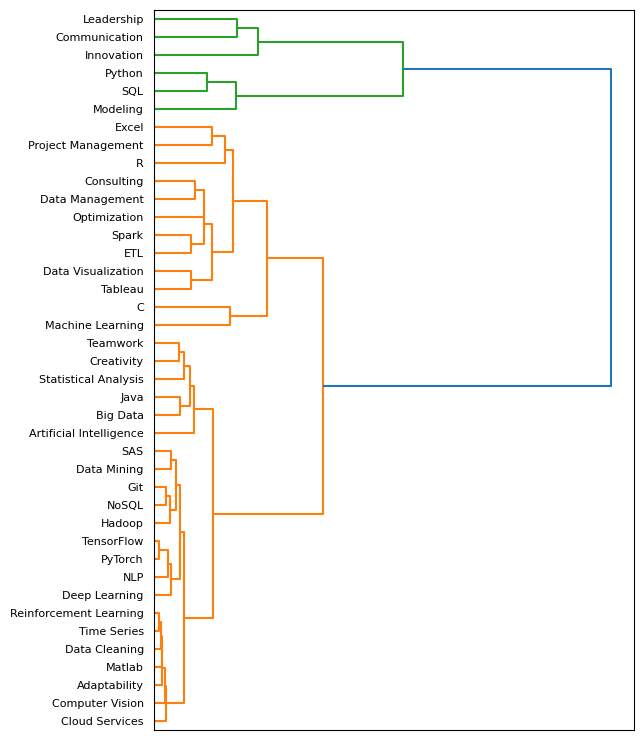

In [ ]:
## Plot dendrogram

fig = plt.figure(figsize=(12,12))
ax = fig.add_axes([0.1,0.1,0.4,0.6])

Z = sch.dendrogram(Y, orientation='right')
labels = df_summary.columns[Z['leaves']]
ax.set_xticks([])
ax.set_yticklabels(labels)

plt.savefig('dendrogram.png', format='png', bbox_inches='tight')
plt.plot()

### Print clusters for selected distance level

In [ ]:
## Cutting the dendrogram at max_d
max_d = 0.6

[]

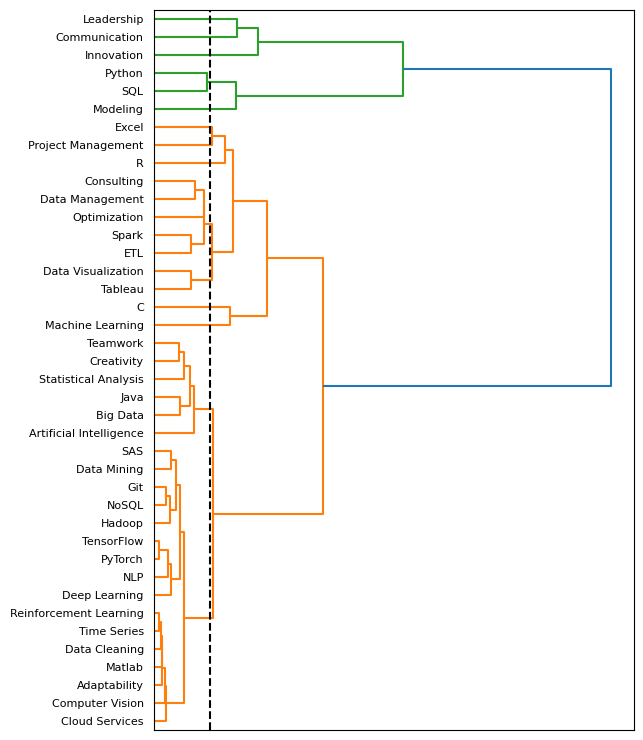

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_axes([0.1,0.1,0.4,0.6])

Z = sch.dendrogram(Y, orientation='right')
labels = df_summary.columns[Z['leaves']]
ax.set_xticks([])
ax.set_yticklabels(labels)

# Cutting the dendrogram at max_d
plt.axvline(x=max_d*D.max(), c='k', linestyle='--')

plt.plot()

In [ ]:
## Identify clusters with max_d cut

lbs = sch.fcluster(Y, max_d*D.max(), 'distance')
clustr = lbs[Z['leaves']]

clust_skls = {}
for k in list(set(clustr)):
    clust_skls[k] = []

for j in range(len(labels)):
    clust_skls[clustr[j]].append(labels[j])

In [ ]:
for key, value in clust_skls.items():
    print(key, value)

1 ['Cloud Services', 'Computer Vision', 'Adaptability', 'Matlab', 'Data Cleaning', 'Time Series', 'Reinforcement Learning', 'Deep Learning', 'NLP', 'PyTorch', 'TensorFlow', 'Hadoop', 'NoSQL', 'Git', 'Data Mining', 'SAS']
2 ['Artificial Intelligence', 'Big Data', 'Java', 'Statistical Analysis', 'Creativity', 'Teamwork']
3 ['Machine Learning']
4 ['C']
5 ['Tableau', 'Data Visualization']
6 ['ETL', 'Spark', 'Optimization', 'Data Management', 'Consulting']
7 ['Project Management']
8 ['Excel']
9 ['R']
10 ['SQL', 'Python']
11 ['Modeling']
12 ['Communication']
13 ['Leadership']
14 ['Innovation']


In [ ]:
print("Number of automatically created clusters:",len(clust_skls))

Number of automatically created clusters: 14


### Manually adjust clusters before analysis (if necessary)

In [ ]:
H_clust_skills = {}

H_clust_skills[0] = ['Cloud Services', 'NLP', 'PyTorch', 'TensorFlow']
H_clust_skills[1] = ['Computer Vision', 'Adaptability', 'Reinforcement Learning']
H_clust_skills[2] = ['Artificial Intelligence', 'Java', 'Creativity', 'Teamwork']
H_clust_skills[3] = ['Machine Learning', 'Deep Learning', 'Modeling']
H_clust_skills[4] = ['Tableau', 'Data Visualization', 'Data Cleaning']
H_clust_skills[5] = ['ETL', 'Optimization', 'Data Management', 'Consulting']
H_clust_skills[6] = ['Project Management', 'Time Series', 'Git']
H_clust_skills[7] = ['Excel', 'C', 'R', 'Matlab']
H_clust_skills[8] = ['Statistical Analysis', 'SAS', 'Data Mining']
H_clust_skills[9] = ['SQL', 'Python', 'NoSQL']
H_clust_skills[10] = ['Spark', 'Hadoop', 'Big Data']
H_clust_skills[11] = ['Communication', 'Leadership', 'Innovation']

In [ ]:
len(H_clust_skills)
print("Number of manually adjusted clusters:",len(clust_skills))

Number of manually adjusted clusters: 12


#K Mean clustering implementation

In [ ]:
# Create DataFrame with skills_to_check as row indices
Kmean_df = pd.DataFrame(index=skills_to_check)

# Add 'Frequency' column to the DataFrame
frequency_dict = dict(sorted_skill_counts[:40])

Kmean_df['Frequency'] = Kmean_df.index.map(frequency_dict)


# Add 'Education Level Percentage' multi-column to the DataFrame
Education_levels = ['Bachelors', 'Masters', 'PhD', 'Diploma']

expanded_Education_levels = {}
for level in Education_levels:
    expanded_Education_levels[level] = expand_words(level) #expanding the levels variations using the function defined before

bachelor_list = []
masters_list = []
phd_list = []
diploma_list = []

for skill, variations in expanded_skills.items():
  bachelor_count = 0
  masters_count = 0
  phd_count = 0
  diploma_count = 0
  counter = 0
  pattern1 = r'\b(?:' + '|'.join([re.escape(variation) for variation in variations]) + r')\b'
  for description in results['Description']:
    if re.search(pattern1, str(description), flags=re.IGNORECASE):
      for level, levelvar in expanded_Education_levels.items():
        pattern2 = r'\b(?:' + '|'.join([re.escape(variation) for variation in levelvar]) + r')\b'
        if re.search(pattern2, str(description), flags=re.IGNORECASE):
          counter += 1
          if level == 'Bachelors':
            bachelor_count += 1
          elif level == 'Masters':
            masters_count += 1
          elif level == 'PhD':
            phd_count += 1
          elif level == 'Diploma':
            diploma_count += 1
  bachelor_list.append(bachelor_count/counter)
  masters_list.append(masters_count/counter)
  phd_list.append(phd_count/counter)
  diploma_list.append(diploma_count/counter)

Kmean_df['Bachelor Percentage'] = bachelor_list
Kmean_df['Masters Percentage'] = masters_list
Kmean_df['PhD Percentage'] = phd_list
Kmean_df['Diploma Percentage'] = diploma_list


# Add 'Job Level Average' column to the DataFrame
Experience_levels = ['entry', 'intermediate', 'senior']

expanded_Experience_levels = {}
for level in Experience_levels:
    expanded_Experience_levels[level] = expand_words(level) #expanding the levels variations using the function defined before

Experience_levels_list = []

for skill, variations in expanded_skills.items():
  counter = 0
  value = 0
  pattern1 = r'\b(?:' + '|'.join([re.escape(variation) for variation in variations]) + r')\b'
  for description in results['Description']:
    if re.search(pattern1, str(description), flags=re.IGNORECASE):
      for level, levelvar in expanded_Experience_levels.items():
        pattern2 = r'\b(?:' + '|'.join([re.escape(variation) for variation in levelvar]) + r')\b'
        if re.search(pattern2, str(description), flags=re.IGNORECASE):
          counter += 1
          if level == 'entry':
            value += 1
          elif level == 'intermediate':
            value += 2
          elif level == 'senior':
            value += 3
  Experience_levels_list.append(value/counter)

Kmean_df['Average Experience Level'] = Experience_levels_list


# Add 'Average working hours type' column to the DataFrame
working_hours_type = ['Full time', 'Part time']

expanded_working_hours_type = {}
for level in working_hours_type:
    expanded_working_hours_type[level] = expand_words(level) #expanding the levels variations using the function defined before

working_hours_type_list = []

for skill, variations in expanded_skills.items():
  counter = 0
  value = 0
  pattern1 = r'\b(?:' + '|'.join([re.escape(variation) for variation in variations]) + r')\b'
  for description in results['Description']:
    if re.search(pattern1, str(description), flags=re.IGNORECASE):
      for level, levelvar in expanded_working_hours_type.items():
        pattern2 = r'\b(?:' + '|'.join([re.escape(variation) for variation in levelvar]) + r')\b'
        if re.search(pattern2, str(description), flags=re.IGNORECASE):
          counter += 1
          if level == 'Part time':
            value += 1
  working_hours_type_list.append(value/counter)

Kmean_df['Average Part Time'] = working_hours_type_list


# Add 'Average location type' column to the DataFrame
location_type = ['remote', 'in person']

expanded_location_type = {}
for level in location_type:
    expanded_location_type[level] = expand_words(level) #expanding the levels variations using the function defined before

location_type_list = []

for skill, variations in expanded_skills.items():
  counter = 0
  value = 0
  pattern1 = r'\b(?:' + '|'.join([re.escape(variation) for variation in variations]) + r')\b'
  for description,location in zip(results['Description'],results['Location']):
    if re.search(pattern1, str(description), flags=re.IGNORECASE):
      for level, levelvar in expanded_location_type.items():
        pattern2 = r'\b(?:' + '|'.join([re.escape(variation) for variation in levelvar]) + r')\b'
        if re.search(pattern2, str(description), flags=re.IGNORECASE) or re.search(pattern2, str(location), flags=re.IGNORECASE):
          counter += 1
          if level == 'remote':
            value += 1
  location_type_list.append(value/counter)

Kmean_df['Percentage of Remote Jobs'] = location_type_list


# Add 'Number of Titles' column to the DataFrame
job_title = ['scientist', 'analyst', 'manager', 'director', 'engineer', ' AI ', 'Artificial Intelligence']

expanded_job_title = {}
for level in job_title:
    expanded_job_title[level] = expand_words(level) #expanding the levels variations using the function defined before

job_title_list = []

for skill, variations in expanded_skills.items():
  number_of_titles = 0
  scientist_test, analyst_test, manager_test, director_test, engineer_test, AI_test = 0,0,0,0,0,0
  pattern1 = r'\b(?:' + '|'.join([re.escape(variation) for variation in variations]) + r')\b'
  for description, title in zip(results['Description'],results['Title']):
    if re.search(pattern1, str(description), flags=re.IGNORECASE):
      #for level, levelvar in expanded_job_title.items():
      for level in job_title:
        #pattern2 = r'\b(?:' + '|'.join([re.escape(variation) for variation in levelvar]) + r')\b'
        pattern2 = r'\b(?:' + '|'.join([re.escape(level)]) + r')\b'
        if re.search(pattern2, str(title), flags=re.IGNORECASE):
            if level == 'scientist':
              scientist_test = 1
            if level == 'analyst':
              analyst_test = 1
            if level == 'manager':
              manager_test = 1
            if level == 'director':
              director_test = 1
            if level == 'engineer':
              engineer_test = 1
            if level == ' AI ' or level == 'Artificial Intelligence':
              AI_test = 1
            break
  number_of_titles = scientist_test+analyst_test+manager_test+director_test+engineer_test+engineer_test
  job_title_list.append(number_of_titles)

Kmean_df['Number of Titles'] = job_title_list


# Add 'Average number of skills needed with this skill' column to the DataFrame

Average_other_skills_list = []

for skill, variations in expanded_skills.items():
  counter = 0
  value = 0
  pattern1 = r'\b(?:' + '|'.join([re.escape(variation) for variation in variations]) + r')\b'
  for description in results['Description']:
    if re.search(pattern1, str(description), flags=re.IGNORECASE):
      counter += 1
      for skill2, variations2 in expanded_skills.items():
        pattern2 = r'\b(?:' + '|'.join([re.escape(variation2) for variation2 in variations2]) + r')\b'
        if re.search(pattern2, str(description), flags=re.IGNORECASE):
          if skill != skill2:
            value +=1

  Average_other_skills_list.append(value/counter)

Kmean_df['Average Other Skills'] = Average_other_skills_list


# Add 'Learning Difficulty' column to the DataFrame
skills_difficulty = {'Communication': 1,'Leadership': 1,'SQL': 2,'Machine Learning': 3,'Python': 2,'Modeling': 2,'Innovation': 2,'R': 2,'Project Management': 2,'Excel': 1,
                     'Tableau': 2,'Optimization': 3,'ETL': 2,'Data Management': 2,'Data Visualization': 2,'C': 2,'Spark': 3,'Big Data': 3,'Artificial Intelligence': 4,'Consulting': 2,'Creativity': 2,
                     'Deep Learning': 4,'Statistical Analysis': 3,'Java': 2,'NLP': 4,'Teamwork': 1,'Data Mining': 3,'SAS': 2,'Hadoop': 3,'PyTorch': 3,'TensorFlow': 3,'NoSQL': 2,'Computer Vision': 3,'Git': 1,
                     'Cloud Services': 3,'Adaptability': 2,'Matlab': 2,'Time Series': 3,'Data Cleaning': 2,'Reinforcement Learning': 3}
Kmean_df['Learning Difficulty'] = Kmean_df.index.map(skills_difficulty)


# Add 'Skill Type' multi-columns to the DataFrame
sskills = ['SQL','Python','R','Excel','Tableau','C','Spark','Java','SAS','Hadoop','PyTorch','TensorFlow','NoSQL','Matlab']
tskills = ['Machine Learning','Modeling','Optimization','ETL','Data Management','Data Visualization','Big Data','Artificial Intelligence','Deep Learning','Statistical Analysis','NLP',
           'Data Mining','Computer Vision','Cloud Services','Data Cleaning','Reinforcement Learning']
bskills = ['Leadership','Project Management','Consulting','Git','Time Series']
pskills = ['Communication','Innovation','Creativity','Teamwork','Adaptability']

slist = []
tlist = []
blist = []
plist = []

for skill in skills_to_check:
  if skill in sskills:
    slist.append(1)
  else: slist.append(0)
  if skill in tskills:
    tlist.append(1)
  else: tlist.append(0)
  if skill in bskills:
    blist.append(1)
  else: blist.append(0)
  if skill in pskills:
    plist.append(1)
  else: plist.append(0)

Kmean_df['Soft Skill'] = slist
Kmean_df['Technical Skill'] = tlist
Kmean_df['Business Skill'] = blist
Kmean_df['Personal Skill'] = plist


# Add 'Average years of experience required' column to the DataFrame

# Define a function to extract years of experience from a job description
def extract_years(description):
    # Regular expression pattern to match years of experience
    pattern = r'(\d+)\s*(?:year|yr)'
    match = re.search(pattern, description, re.IGNORECASE)
    if match:
        return int(match.group(1))  # Extract the matched number of years
    else:
        return None

Average_years_list = []

for skill, variations in expanded_skills.items():
  counter = 0
  value = 0
  pattern1 = r'\b(?:' + '|'.join([re.escape(variation) for variation in variations]) + r')\b'
  for description in results['Description']:
    if re.search(pattern1, str(description), flags=re.IGNORECASE):
      current_ye = extract_years(str(description))
      if current_ye != None:
        counter += 1
        value += current_ye

  Average_years_list.append(value/counter)

Kmean_df['Average Years of Experience'] = Average_years_list

Kmean_df

,Frequency,Bachelor Percentage,Masters Percentage,PhD Percentage,Diploma Percentage,Average Experience Level,Average Part Time,Percentage of Remote Jobs,Number of Titles,Average Other Skills,Learning Difficulty,Soft Skill,Technical Skill,Business Skill,Personal Skill,Average Years of Experience
Communication,3048,0.444256,0.480625,0.056084,0.019035,2.437222,0.155779,0.865559,6,5.617673,1,0,0,0,1,13.844633
Leadership,2729,0.432393,0.487346,0.060376,0.019884,2.477960,0.149425,0.891145,6,5.627158,1,0,0,1,0,15.824669
SQL,2313,0.468889,0.462778,0.054444,0.013889,2.486486,0.109091,0.864759,6,7.263048,2,1,0,0,0,12.818885
Machine Learning,2184,0.356220,0.475767,0.150242,0.017771,2.468599,0.157895,0.890756,6,7.544304,3,0,1,0,0,16.900474
Python,1889,0.413191,0.479143,0.094701,0.012965,2.494681,0.126050,0.887097,6,7.656407,2,1,0,0,0,13.135182
Modeling,1522,0.427544,0.473279,0.083248,0.015930,2.522849,0.086957,0.881657,6,6.944554,2,0,1,0,0,15.693233
Innovation,1448,0.432526,0.481283,0.069204,0.016986,2.439394,0.128889,0.898592,6,5.944401,2,0,0,0,1,15.561879
R,992,0.401174,0.488258,0.092955,0.017613,2.437126,0.142857,0.876574,6,8.127517,2,1,0,0,0,12.079646
Project Management,838,0.454212,0.492063,0.035409,0.018315,2.476510,0.153846,0.904762,6,5.870968,2,0,0,1,0,12.210702
Excel,832,0.486577,0.466443,0.025727,0.021253,2.372093,0.127660,0.823096,6,5.587302,1,1,0,0,0,11.867403


### Performing K means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

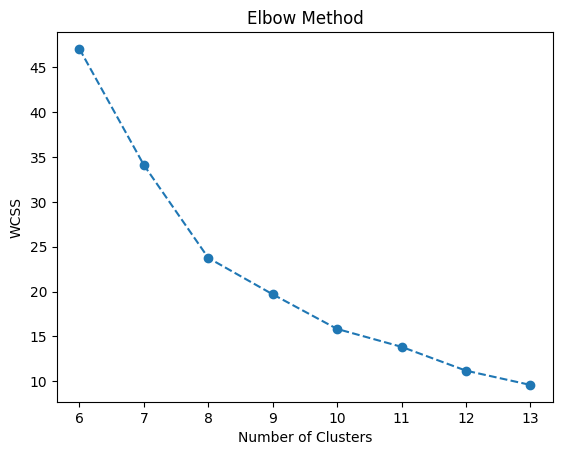

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


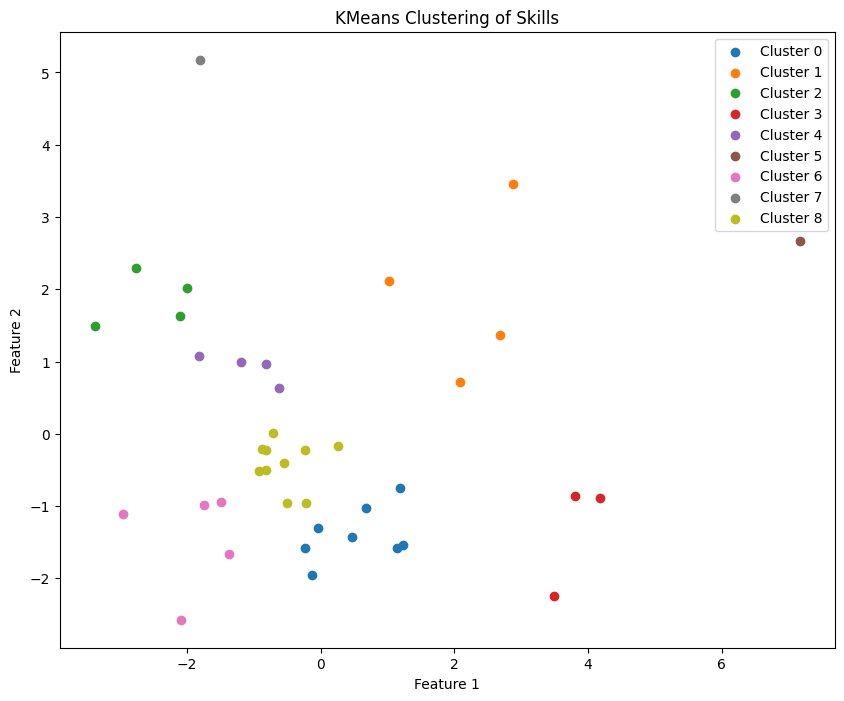

In [ ]:
#####
# Step 1: Standardize the feature values
scaler = StandardScaler()
scaled_features = scaler.fit_transform(Kmean_df.values)

# Step 2: Reduce dimensionality (optional but often useful)
pca = PCA(n_components=2)
scaled_features_pca = pca.fit_transform(scaled_features)
#####

# Step 1: Prepare the data
#X = Kmean_df.values
X = scaled_features_pca

# Step 2: Determine the optimal number of clusters using the elbow method
# Initialize an empty list to store the within-cluster sum of squares (WCSS) for different k values
wcss = []

# Try k values from 6 to 13
for i in range(6, 14):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(6, 14), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Step 3: Perform KMeans clustering with the optimal k value
optimal_k = 9  # You can choose the k value based on the elbow method graph
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Step 4: Add cluster labels to the DataFrame
Kmean_df['Cluster'] = labels

# Step 5: Visualize the clusters
plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):
    cluster_skills = Kmean_df[Kmean_df['Cluster'] == cluster].index
    plt.scatter(X[Kmean_df.index.isin(cluster_skills)][:, 0], X[Kmean_df.index.isin(cluster_skills)][:, 1], label=f'Cluster {cluster}')

plt.title('KMeans Clustering of Skills')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [ ]:
# Step 4: Add cluster labels to the DataFrame
Kmean_df['Cluster'] = labels

# Step 5: Print the skills in each cluster
for cluster in range(optimal_k):
    cluster_skills = Kmean_df[Kmean_df['Cluster'] == cluster].index
    print(f"Cluster {cluster} Skills:")
    print(cluster_skills)
    print()


Cluster 0 Skills:
Index(['Machine Learning', 'Modeling', 'Optimization', 'ETL',
       'Data Visualization', 'Big Data', 'Data Mining', 'Hadoop'],
      dtype='object')

Cluster 1 Skills:
Index(['PyTorch', 'TensorFlow', 'Git', 'Time Series'], dtype='object')

Cluster 2 Skills:
Index(['Communication', 'Innovation', 'Creativity', 'Teamwork'], dtype='object')

Cluster 3 Skills:
Index(['Deep Learning', 'NLP', 'Computer Vision'], dtype='object')

Cluster 4 Skills:
Index(['Leadership', 'Project Management', 'C', 'Consulting'], dtype='object')

Cluster 5 Skills:
Index(['Reinforcement Learning'], dtype='object')

Cluster 6 Skills:
Index(['SQL', 'Excel', 'Tableau', 'Java', 'Data Cleaning'], dtype='object')

Cluster 7 Skills:
Index(['Adaptability'], dtype='object')

Cluster 8 Skills:
Index(['Python', 'R', 'Data Management', 'Spark', 'Artificial Intelligence',
       'Statistical Analysis', 'SAS', 'NoSQL', 'Cloud Services', 'Matlab'],
      dtype='object')



###Manually Adjusting Clusters if Necessary

In [ ]:
#Manually adjusting K_mean Clusters
K_clust_skills = {}

K_clust_skills[0] = ['Machine Learning', 'Modeling', 'Optimization', 'ETL', 'Data Visualization', 'Big Data', 'Data Mining', 'Hadoop']
K_clust_skills[1] = ['PyTorch', 'TensorFlow', 'Git', 'Time Series']
K_clust_skills[2] = ['Communication', 'Innovation', 'Creativity', 'Teamwork', 'Adaptability']
K_clust_skills[3] = ['Deep Learning', 'NLP', 'Computer Vision']
K_clust_skills[4] = ['Leadership', 'Project Management', 'C', 'Consulting']
K_clust_skills[5] = ['Reinforcement Learning', 'Artificial Intelligence', 'Cloud Services']
K_clust_skills[6] = ['SQL', 'Excel', 'Tableau', 'Java', 'Data Cleaning']
K_clust_skills[7] = ['Python', 'R', 'Matlab']
K_clust_skills[8] = ['Data Management', 'Spark', 'Statistical Analysis', 'SAS', 'NoSQL']

#Interpretation of results using ChatGPT API

In [ ]:
def Course_name(text): #defining a function to get course name
    # Prompt for the model
    prompt = "Based on the courses provided and their topic, give a short name of the topic: '{}'".format(text)

    # Send prompt to the API
    client = OpenAI()
    response = client.chat.completions.create(
      model = model,
      max_tokens=300,
      messages = [
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt}
      ]
    )

    return response.choices[0].message.content

In [ ]:
H_input_skills = ''
for i in H_clust_skills.keys():
  prompt1 = 'Course ' + str(i+1) + ': ' + ', '.join(H_clust_skills[i])
  print(prompt1)
  print(Course_name(prompt1))
  H_input_skills += prompt1 + " \n"

In [ ]:
K_input_skills = ''
for i in K_clust_skills.keys():
  prompt1 = 'Course ' + str(i+1) + ': ' + ', '.join(K_clust_skills[i])
  print(prompt1)
  print(Course_name(prompt1))
  K_input_skills += prompt1 + " \n"

In [ ]:
H_courses_ordered = '''Course 1: Communication, Leadership, Innovation (Foundational skills for any professional)
Course 2: Artificial Intelligence, Java, Creativity, Teamwork (Understanding AI principles and teamwork skills)
Course 3: Excel, C, R, Matlab (Basics of programming and data manipulation)
Course 4: SQL, Python, NoSQL (Fundamentals of data querying and manipulation)
Course 5: Tableau, Data Visualization, Data Cleaning (Data visualization and preparation)
Course 6: Statistical Analysis, SAS, Data Mining (Data analysis techniques)
Course 7: Machine Learning, Deep Learning, Modeling (Introduction to machine learning concepts)
Course 8: Cloud Services, NLP, PyTorch, TensorFlow (Advanced topics in machine learning and cloud computing)
Course 9: Spark, Hadoop, Big Data (Handling big data and distributed computing)
Course 10: Project Management, Time Series, Git (Project management and time series analysis)
Course 11: ETL, Optimization, Data Management, Consulting (Advanced data management and consulting skills)
Course 12: Computer Vision, Adaptability, Reinforcement Learning (Specialized topics in AI and adaptability in technology)'''

K_courses_ordered = '''Course 1: Communication, Innovation, Creativity, Teamwork, Adaptability (Foundational skills for any professional)
Course 2: SQL, Excel, Tableau, Java, Data Cleaning (Basic data manipulation and visualization)
Course 3: Python, R, Matlab (Programming languages for data analysis and modeling)
Course 4: Machine Learning, Modeling, Optimization, ETL, Data Visualization, Big Data, Data Mining, Hadoop (Introduction to various data-related concepts and technologies)
Course 5: Deep Learning, NLP, Computer Vision (Advanced topics in artificial intelligence)
Course 6: Data Management, Spark, Statistical Analysis, SAS, NoSQL (Advanced data management and analysis techniques)
Course 7: PyTorch, TensorFlow, Git, Time Series (Advanced machine learning frameworks and time series analysis)
Course 8: Reinforcement Learning, Artificial Intelligence, Cloud Services (Specialized topics in AI and cloud computing)
Course 9: Leadership, Project Management, C, Consulting (Leadership skills and project management, with a focus on technical consulting)'''

In [ ]:
def Course_Description(text): #defining a function to get program description
    # Prompt for the model
    prompt = "Based on the courses provided and their topic, give a short description of this curriculum that would entice potential students to enrol in this program: '{}'".format(text)

    # Send prompt to the API
    client = OpenAI()
    response = client.chat.completions.create(
      model = model,
      max_tokens=300,
      messages = [
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt}
      ]
    )

    return response.choices[0].message.content

In [ ]:
print("H course :", Course_Description(H_courses_ordered))

H course : Embark on an exciting journey of mastering essential skills in communication, leadership, and innovation with our comprehensive curriculum. From delving into the fundamental principles of Artificial Intelligence, programming languages, and data manipulation techniques to advanced topics in machine learning, cloud computing, and big data analysis, this program equips you with the cutting-edge knowledge and hands-on skills needed in today's data-driven world. Gain expertise in data visualization, statistical analysis, project management, and specialized areas like computer vision and reinforcement learning, preparing you for a successful career in the ever-evolving field of AI and data management. Join us and unlock your potential to shape the future of technology!


In [ ]:
print("K course :", Course_Description(K_courses_ordered))

K course : Are you seeking to become a highly skilled data analyst and AI specialist with a strong foundation in essential technical and soft skills? Our comprehensive curriculum covers everything from basic data manipulation to advanced artificial intelligence topics. With courses ranging from foundational communication and teamwork skills to specialized courses on cutting-edge technologies such as deep learning, reinforcement learning, and cloud services, this program is designed to equip you with the knowledge and skills needed to thrive in the rapidly evolving field of data analysis and artificial intelligence. Enrol now and turn your passion for data into a rewarding and impactful career!


In [ ]:
def Course_Relation(text): #defining a function to get courses relation
    # Prompt for the model
    prompt = "Based on the courses provided and their topic, give a short description of how these courses relate to each other: '{}'".format(text)

    # Send prompt to the API
    client = OpenAI()
    response = client.chat.completions.create(
      model = model,
      max_tokens=300,
      messages = [
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt}
      ]
    )

    return response.choices[0].message.content

In [ ]:
print("H course :", Course_Relation(H_courses_ordered))

H course : These courses cover a wide range of topics related to data science, artificial intelligence, and professional skills. 

- Courses 3 and 4 introduce the basics of programming and data manipulation, which are foundational skills necessary for data-related fields.
- Courses 5 and 6 focus on data visualization, cleaning, and statistical analysis, which are crucial for interpreting and analyzing data effectively.
- Courses 7 and 8 delve into machine learning concepts and advanced topics, providing a deeper understanding of predictive modeling and cloud computing.
- Course 9 expands on handling big data and distributed computing, which are essential skills for working with large datasets.
- Course 10 introduces project management and time series analysis, which are important for managing data projects and analyzing sequential data.
- Course 11 covers advanced data management and consulting skills, essential for professionals seeking to optimize data processes and provide strategic

In [ ]:
print("K course :", Course_Relation(K_courses_ordered))

K course : These courses form a structured pathway for individuals looking to build a career in data science and artificial intelligence, with a strong emphasis on technical skills and complementary competencies:

1. **Courses 2 and 3**: Course 2 introduces fundamental data manipulation and visualization tools like SQL, Excel, and Tableau, while Course 3 delves into programming languages necessary for data analysis and modeling.
   
2. **Courses 4 and 6**: Course 4 provides an introduction to various data-related concepts, technologies, and techniques, while Course 6 focuses on advanced data management and analysis with tools like Spark and NoSQL.

3. **Courses 5 and 7**: After mastering the foundational and advanced data skills, Courses 5 and 7 cover advanced topics in artificial intelligence and machine learning frameworks like Deep Learning, NLP, and TensorFlow.

4. **Courses 8 and 9**: Lastly, Courses 8 and 9 touch on specialized AI topics such as Reinforcement Learning and Cloud S

In [ ]:
def Single_program(text): #defining a function to get courses relation
    # Prompt for the model
    prompt = "Based on the two teaching courses provided and their topic, give a better new program by chosing 10 courses from either group : '{}'".format(text)

    # Send prompt to the API
    client = OpenAI()
    response = client.chat.completions.create(
      model = model,
      max_tokens=400,
      messages = [
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt}
      ]
    )

    return response.choices[0].message.content

In [ ]:
two_groups = "First Program:" + "\n" + H_courses_ordered + "\n\n" + "Second Program:" + "\n" + K_courses_ordered
print(Single_program(two_groups))

Considering the topics covered in the two teaching courses provided, a new program could be designed by selecting 10 courses from the available options to create a well-rounded curriculum that covers foundational skills, technical knowledge, and advanced topics. Here is a suggested new program:

1. Communication, Leadership, Innovation
2. Artificial Intelligence, Java, Creativity, Teamwork
3. SQL, Python, NoSQL
4. Tableau, Data Visualization, Data Cleaning
5. Statistical Analysis, SAS, Data Mining
6. Machine Learning, Deep Learning, Modeling
7. Cloud Services, NLP, PyTorch, TensorFlow, Git
8. Spark, Hadoop, Big Data
9. Project Management, Time Series
10. ETL, Optimization, Data Management, Consulting

This program aims to provide a comprehensive understanding of data-related concepts, programming languages, machine learning techniques, cloud computing, big data handling, project management, and consulting skills. It covers both foundational and advanced topics, equipping students with 